In [1]:
import cv2
import numpy as np
import os
import sys
import matplotlib.pyplot as plt

In [2]:
def find_edges(img_src):
    grey_scale_8 = cv2.imread(img_src, cv2.IMREAD_REDUCED_GRAYSCALE_8)
    edges = cv2.Canny(grey_scale_8, 60, 130)
    
    plt.imshow(edges, cmap="gray")
    plt.show()

    y_last = sys.maxsize
    x_last = sys.maxsize
    y_max_gap = 50
    x_max_gap = 50

    lower = sys.maxsize
    upper = 0
    left = sys.maxsize
    right = 0

    y = 0
    x = 0
    
    for row in edges:
        for pix in row:
            # Found edge
            if pix == 255:
                # If a pixel is found we check if the current x and y are closer to the last x and y than the max_gap aLLows for
                # If that is the case we set the new found upper, lower, left and right boundaries
                # If the pixel is further away than the max gap, we break the loop and skip to the next pixel without updating the last, thus enforcing
                    # the break in the next iteration of the loop

                # Check if y gap exceeding theshold has been reached
                if y - y_last > y_max_gap:
                    break
                else:
                    y_last = y

                # Check if x gap exceeding theshold has been reached
                if x - x_last > x_max_gap:
                    break
                else:
                    x_last = x

                 # Check boundaries
                if upper < y:
                    upper = y
                
                if right < x:
                    right = x

                if lower > y:
                    lower = y
                
                if left > x:
                    left = x

            x += 1

        y += 1
        x = 0

    return {"Upper": upper, "Lower": lower, "Left": left, "Right": right}
#     print(f"Lower: {lower}")
#     print(f"Upper: {upper}")
#     print(f"Left: {left}")
#     print(f"Right: {right}")

# find_edges("E.jpg")

In [3]:
def crop_image(img_src, boundaries):
    img_gray = cv2.imread(img_src, cv2.IMREAD_REDUCED_GRAYSCALE_8)
    return img_gray[boundaries["Lower"]:boundaries["Upper"] + 1, boundaries["Left"]:boundaries["Right"] + 1]

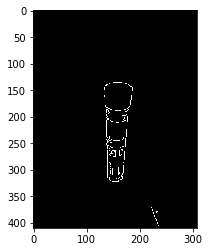

{'Upper': 322, 'Lower': 136, 'Left': 134, 'Right': 185}


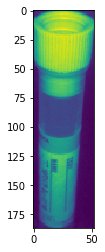

Writing test tube: Test Tubes-1/E.jpg


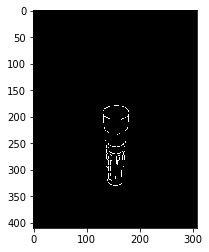

{'Upper': 330, 'Lower': 179, 'Left': 131, 'Right': 180}


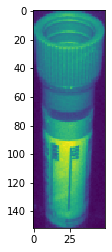

Writing test tube: Test Tubes-1/F (2).jpg


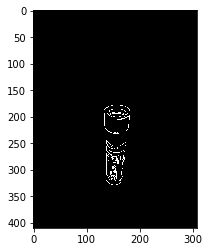

{'Upper': 329, 'Lower': 178, 'Left': 133, 'Right': 182}


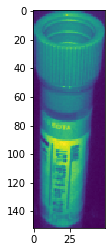

Writing test tube: Test Tubes-1/F (3).jpg


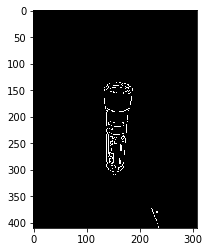

{'Upper': 310, 'Lower': 136, 'Left': 133, 'Right': 186}


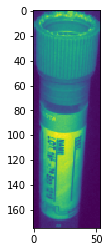

Writing test tube: Test Tubes-1/F.jpg


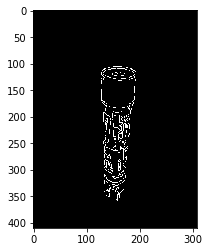

{'Upper': 359, 'Lower': 106, 'Left': 127, 'Right': 193}


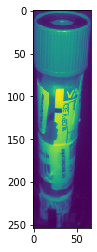

Writing test tube: Test Tubes-1/J(4).jpg


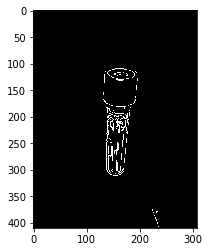

{'Upper': 311, 'Lower': 110, 'Left': 131, 'Right': 196}


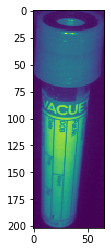

Writing test tube: Test Tubes-1/J.jpg


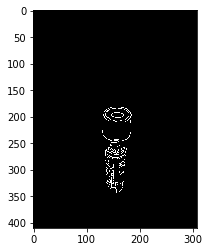

{'Upper': 343, 'Lower': 182, 'Left': 130, 'Right': 184}


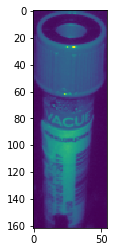

Writing test tube: Test Tubes-1/L.jpg


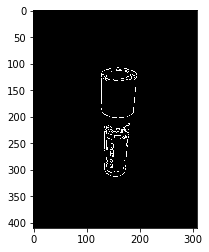

{'Upper': 313, 'Lower': 108, 'Left': 128, 'Right': 195}


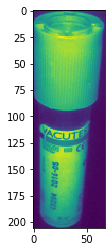

Writing test tube: Test Tubes-1/M.jpg


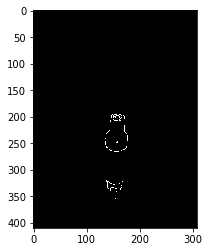

{'Upper': 266, 'Lower': 195, 'Left': 136, 'Right': 177}


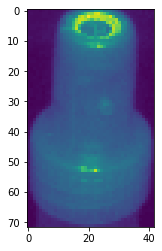

Writing test tube: Test Tubes-1/O (4).jpg


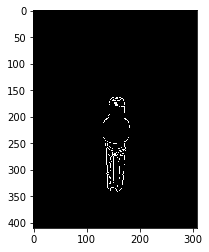

{'Upper': 341, 'Lower': 163, 'Left': 131, 'Right': 181}


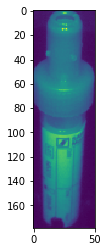

Writing test tube: Test Tubes-1/O(3).jpg


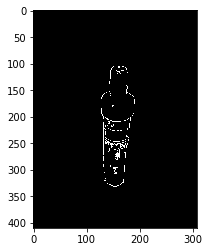

{'Upper': 331, 'Lower': 105, 'Left': 127, 'Right': 189}


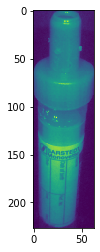

Writing test tube: Test Tubes-1/O.jpg


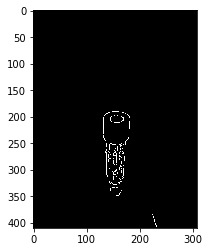

{'Upper': 348, 'Lower': 190, 'Left': 131, 'Right': 182}


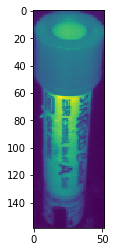

Writing test tube: Test Tubes-1/Q.jpg


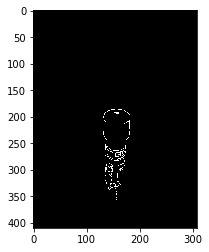

{'Upper': 357, 'Lower': 186, 'Left': 132, 'Right': 182}


KeyboardInterrupt: 

In [4]:
for i in range(1, 3):
    for img_src in os.listdir(f"Test Tubes-{i}"):
        # Check if image (can be expanded upon)
        if img_src.endswith(".jpg"):
            boundaries = find_edges(f"Test Tubes-{i}/{img_src}")
            print(boundaries)
            img_cropped = crop_image(f"Test Tubes-{i}/{img_src}", boundaries)
            plt.imshow(img_cropped)
            plt.show()
            print(f"Writing test tube: Test Tubes-{i}/{img_src}")
            cv2.imwrite(f"output-{i}/{img_src}", img_cropped)

print("Done")
